# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
'''
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

'''

'\nlat_lngs = []\ncities = []\n\n# Create a set of random lat and lng combinations\nlats = np.random.uniform(low=-90.000, high=90.000, size=1500)\nlngs = np.random.uniform(low=-180.000, high=180.000, size=1500)\nlat_lngs = zip(lats, lngs)\n\n# Identify nearest city for each lat, lng combination\nfor lat_lng in lat_lngs:\n    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name\n    \n    # If the city is unique, then add it to a our cities list\n    if city not in cities:\n        cities.append(city)\n\n# Print the city count to confirm sufficient count\nlen(cities)\n\n'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
%matplotlib inline
# Dependencies and Setup

import pandas as pd
from weatherdata import weatherData
from matplotlib import pyplot as plt
from scipy.stats import linregress
#from citipy import citipy

#from citipy import citipy

'''
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

'''
'''
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).
'''


'''
responses = pd.DataFrame

print("running weather check on each city ")
for i in range(len(cities)):

    print("processing city number")
    print(i)
    print(cities[i])
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = cities[i]
    units = "metric"
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    responses.append(weather_json)

    time.sleep(1)

'''

# I saved the result of the API call into a file so I didn't need to keep rerunning the API call which took 15 mins
# result is saved and imported 
d = weatherData

#get rid of empty cities
dfiltered = [x for x in d if not len(x)<10]
cloudiness = []
for i in range(len(dfiltered)):
    cloudiness.append((dfiltered[i]["clouds"]['all']))

#print(cloudiness)
dfiltered = pd.DataFrame(dfiltered)
filtered = pd.DataFrame()

filtered['City'] = dfiltered['name']
filtered['Date'] = dfiltered['dt']
filtered['Cloudiness'] = cloudiness
sys = pd.DataFrame(dfiltered['sys'])

countries = []
humidity = []
lat = []
lon = []
maxTemp = []
windSpeed = []
for index, row in dfiltered.iterrows():
    countries.append((row['sys']['country']))
    humidity.append((row['main']['humidity']))
    maxTemp.append((row['main']['temp_max']))
    windSpeed.append((row['wind']['speed']))
    lat.append((row['coord']['lat']))
    lon.append((row['coord']['lon']))



filtered['Countries'] = countries
filtered['humidity'] = humidity
filtered['lat'] = lat
filtered['lon'] = lon
filtered['maxTemp'] = maxTemp
filtered['windSpeed'] = windSpeed

north = filtered[filtered['lat'] >=0 ]
#print(north)
south = filtered[filtered['lat'] < 0]
#print(south)


lat =  filtered['lat'].tolist()
temp = filtered['maxTemp'].tolist()
hum = filtered['humidity'].tolist()
cl = filtered['Cloudiness'].tolist()
ws = filtered['windSpeed'].tolist()

nlat =  north['lat'].tolist()
ntemp = north['maxTemp'].tolist()
nhum = north['humidity'].tolist()
ncl = north['Cloudiness'].tolist()
nws = north['windSpeed'].tolist()

slat =  south['lat'].tolist()
stemp = south['maxTemp'].tolist()
shum = south['humidity'].tolist()
scl = south['Cloudiness'].tolist()
sws = south['windSpeed'].tolist()



# function that prints a lineplot or scatter plot

#arguments (x axis array [], y axis array[], x axis label string , y label string, title string , 1 to add regression  line )

def linearPlot(xList, yList, xlabel, ylabel, title, lineBool):
    t =""
    #if we want a regression line add it 
    if lineBool ==1:
        (slope, intercept, rvalue, pvalue, stderr) = linregress(xList, yList)
        print(f"The r-squared is: {rvalue}" " for " + xlabel + " / " + ylabel + "")
        #plt.show()
        regress_values = []

        for i in xList:

            regress_values.append ( i * slope + intercept )

        plt.plot(xList,regress_values,"r-")
       # plt.annotate('annotate', xy=(2, 1), xytext=(3, 4),
        #        arrowprops=dict(facecolor='black', shrink=0.05))
        t = 'y={:.2f}x+{:.2f}'.format(slope,intercept)
        #plt.annotate(t , xy=(0,0), xytext =(0,0), color="r")

    plt.scatter(xList,yList)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if lineBool == 1:
        plt.title(title + '\n regression line: ' + t)
    else:
        plt.title(title)

    
    plt.show()
   
     



# convert to csv and display dataframe

filtered.to_csv(r'data.csv', index = None)
#print(filtered )











'\nYour next objective is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):\n\n'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

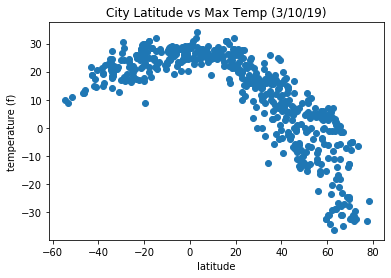

In [4]:
linearPlot(lat,temp,"latitude","temperature (f)", "City Latitude vs Max Temp (3/10/19)",0)

#### Latitude vs. Humidity Plot

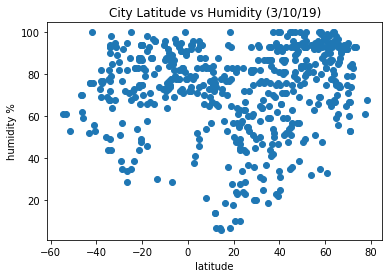

In [5]:
linearPlot(lat,hum,"latitude","humidity %", "City Latitude vs Humidity (3/10/19)",0)

#### Latitude vs. Cloudiness Plot

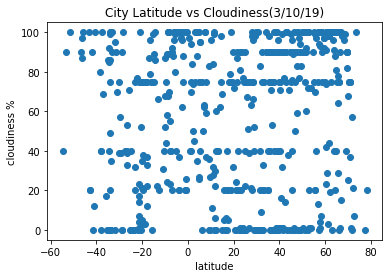

In [6]:
linearPlot(lat,cl,"latitude","cloudiness %", "City Latitude vs Cloudiness(3/10/19)",0)

#### Latitude vs. Wind Speed Plot

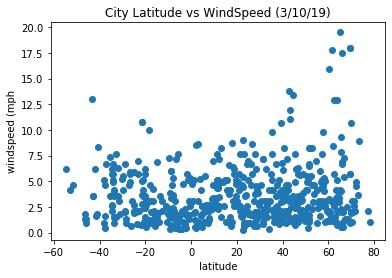

In [7]:
linearPlot(lat,ws,"latitude","windspeed (mph", "City Latitude vs WindSpeed (3/10/19)",0)

## Linear Regression

In [8]:
# OPTIONAL: Create a function to create Linear Regression plots


In [9]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8564762346487594 for latitude / temperature (f)


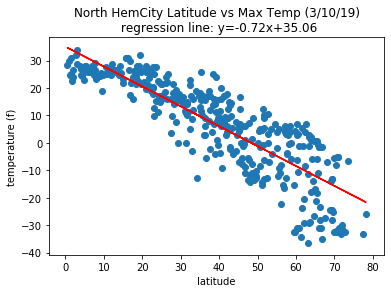

In [10]:
linearPlot(nlat,ntemp,"latitude","temperature (f)", "North HemCity Latitude vs Max Temp (3/10/19)",1)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.648996689208582 for latitude / temperature (f)


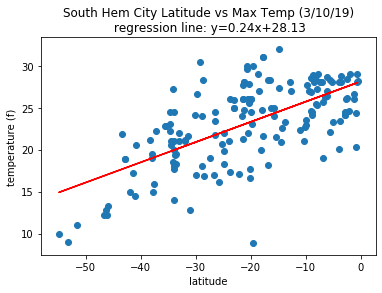

In [11]:
linearPlot(slat,stemp,"latitude","temperature (f)", "South Hem City Latitude vs Max Temp (3/10/19)",1)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3059735851218424 for latitude / humidity %


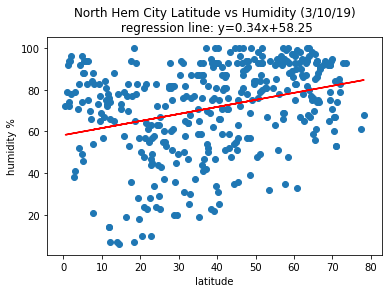

In [12]:
linearPlot(nlat,nhum,"latitude","humidity %", "North Hem City Latitude vs Humidity (3/10/19)",1)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2831163665004655 for latitude / humidity %


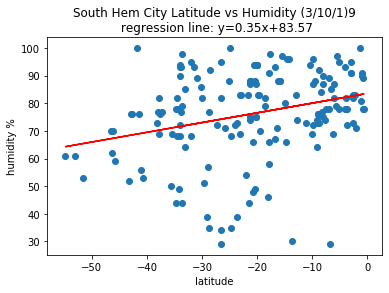

In [13]:
linearPlot(slat,shum,"latitude","humidity %", "South Hem City Latitude vs Humidity (3/10/1)9",1)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16572876066636225 for latitude / cloudiness %


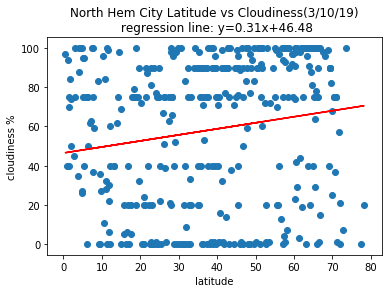

In [14]:
linearPlot(nlat,ncl,"latitude","cloudiness %", "North Hem City Latitude vs Cloudiness(3/10/19)",1)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1245531270170819 for latitude / cloudiness %


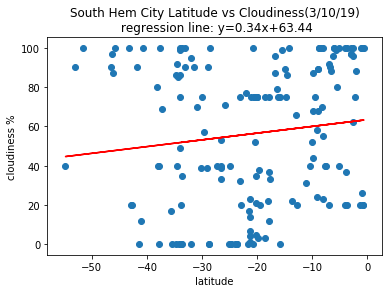

In [15]:
linearPlot(slat,scl,"latitude","cloudiness %", "South Hem City Latitude vs Cloudiness(3/10/19)",1)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.13272048118704666 for latitude / windspeed (mph


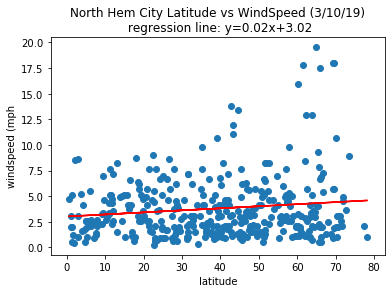

In [16]:
linearPlot(nlat,nws,"latitude","windspeed (mph", "North Hem City Latitude vs WindSpeed (3/10/19)",1)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23996162093483972 for latitude / windspeed (mph


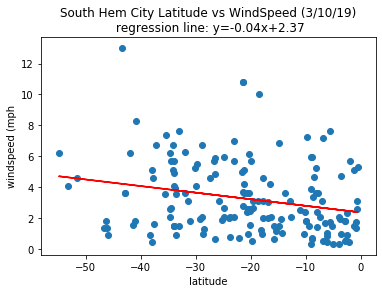

In [17]:
linearPlot(slat,sws,"latitude","windspeed (mph", "South Hem City Latitude vs WindSpeed (3/10/19)",1)